1.Download the dataset

2.Load the dataset 

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.rename(columns = {'Annual Income (k$)':'annual_income'}, inplace = True)

In [6]:
df.rename(columns = {'Spending Score (1-100)':'spending_score'}, inplace = True)

3.Visualizations ( Univariant , Bivariant , Multivariant )

A.Univariant Analysis

In [7]:
df["annual_income"].mean()

60.56

In [8]:
df["annual_income"].std()

26.264721165271244

In [9]:
df['annual_income'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: annual_income, Length: 64, dtype: int64

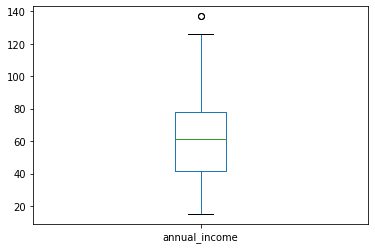

In [10]:
import matplotlib.pyplot as plt
df.boxplot(column=['annual_income'],grid=False)

B.Bivariant Analysis

Text(0, 0.5, 'Annual Income')

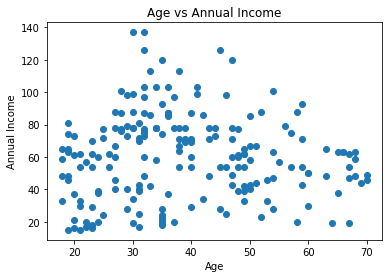

In [11]:
plt.scatter(df.Age,df.annual_income)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

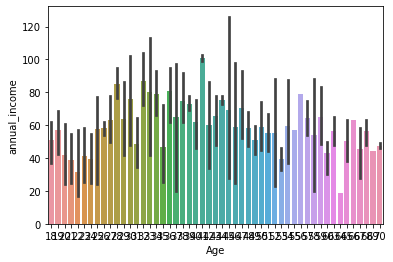

In [13]:
import seaborn as sns
sns.barplot(x='Age',y='annual_income',data = df)

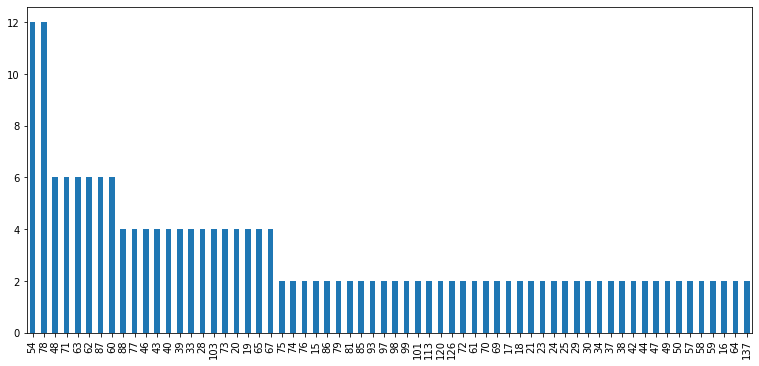

In [14]:
df['annual_income'].value_counts().plot.bar(figsize = (13, 6))

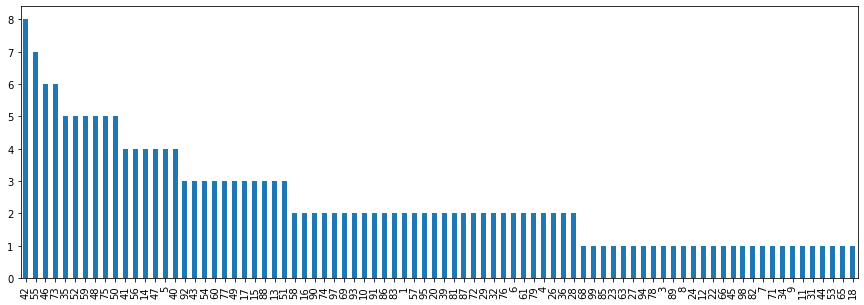

In [15]:
df['spending_score'].value_counts().plot.bar(figsize = (15, 5))

C.Multi-Variate Analysis

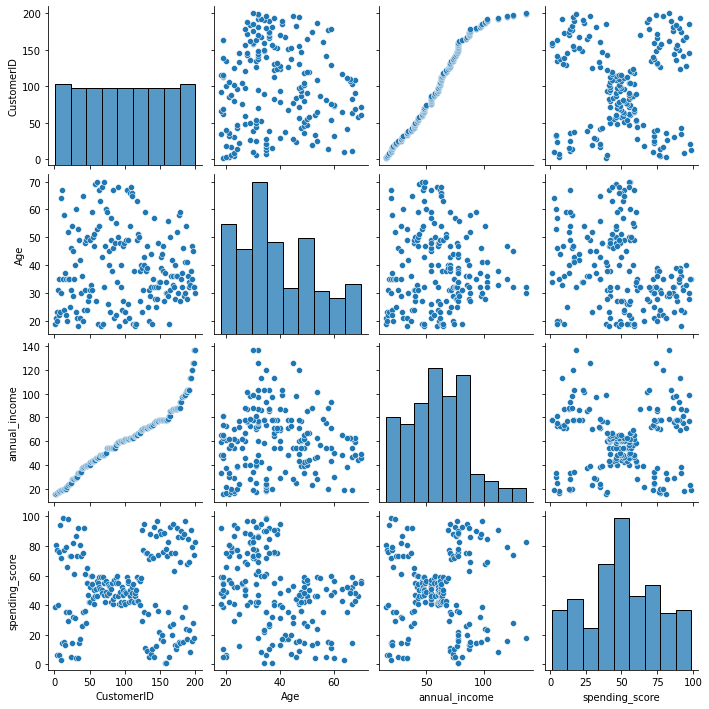

In [16]:
sns.pairplot(df)

4. Perform descriptive statistics on the dataset

In [17]:
df.corr()

,CustomerID,Age,annual_income,spending_score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


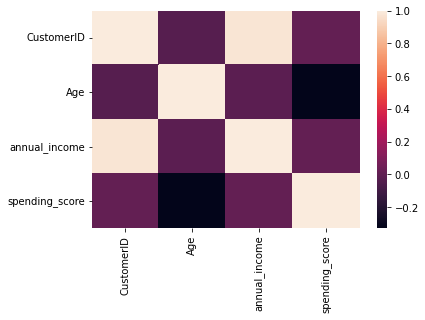

In [18]:
sns.heatmap(df.corr())

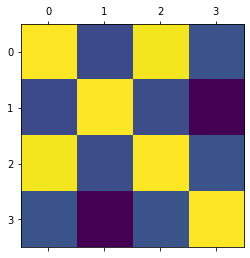

In [19]:
plt.matshow(df.corr())

5.Check for Missing values and deal with them.

In [20]:
df.isnull().any()

CustomerID        False
Gender            False
Age               False
annual_income     False
spending_score    False
dtype: bool

There are no missing values present in this dataset.

6.Find the outliers and replace them outliers

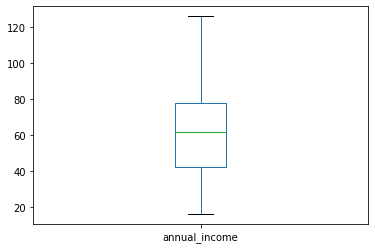

In [22]:
low = df["annual_income"].quantile(0.01)
high  = df["annual_income"].quantile(0.99)

df_filtered = df[(df["annual_income"] < high) & (df["annual_income"] > low)]
df_filtered.boxplot(column=['annual_income'],grid=False)

7.Check for Categorical columns and perform encoding.

In [23]:
df["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [25]:
from sklearn import preprocessing

In [26]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  

In [27]:
df["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

8.Split the data into dependent and independent variables.

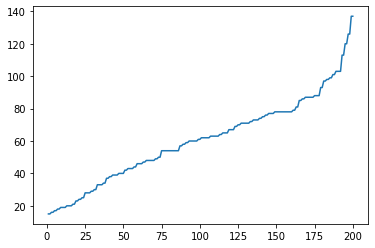

In [28]:
x = df['CustomerID']
y = df['annual_income']

plt.plot(x, y)

In [30]:
x = df.iloc[:, [3, 4]].values

x.shape

(200, 2)

9. Perform any of the clustering algorithms

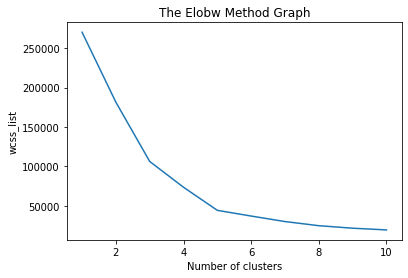

In [34]:
from sklearn.cluster import KMeans  
wcss_list= [] 
  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_) 

plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters')  
plt.ylabel('wcss_list')  
plt.show()  

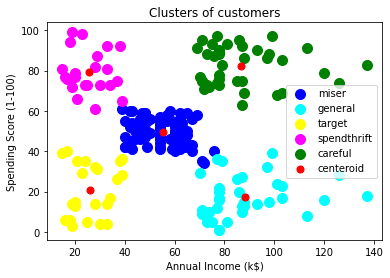

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_means= kmeans.fit_predict(x)  

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'yellow', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'green', label = 'careful')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red' , label = 'centeroid')

plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()
plt.show()

11. Split the data into dependent and independent
variables.


In [40]:
df1=df[["CustomerID","Gender","Age","annual_income","spending_score"]]
X=df1[["annual_income","spending_score"]]

12. Split the data into training and testing
13. Build the Model

In [41]:
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


14. Train the Model

In [42]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

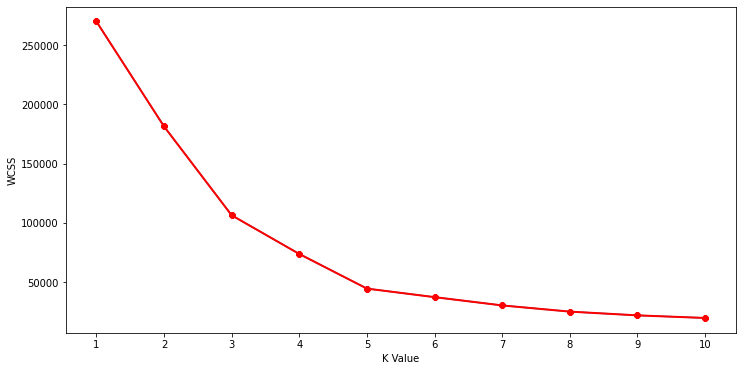

In [43]:
import numpy as np
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

15. Test the Model

In [45]:
kmeans1=KMeans(n_clusters=5)
kmeans1.fit(X)
y=kmeans1.predict(X)
df1["label"] = y
df1.head()

,CustomerID,Gender,Age,annual_income,spending_score,label
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


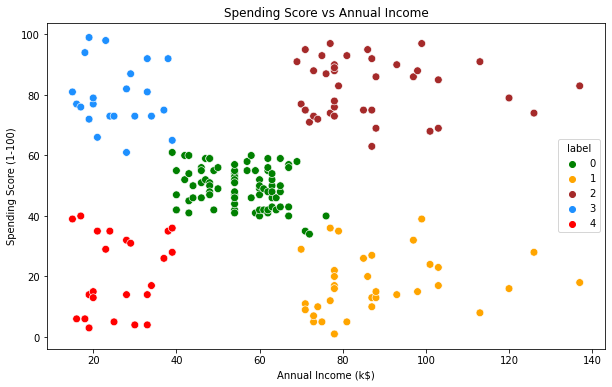

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'annual_income',y = 'spending_score',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score vs Annual Income')
plt.show()

16. Measure the performance using Evaluation Metrics

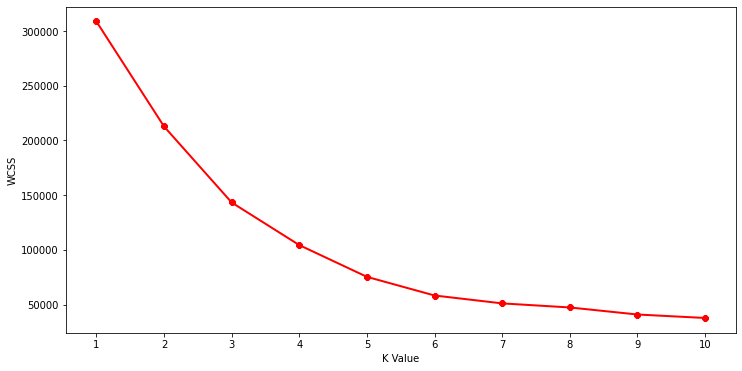

In [48]:
X2=df1[["Age","annual_income","spending_score"]]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [49]:
cust1=df1[df1["label"]==0]
print('Number of customers in first group :', len(cust1))
print(cust1["CustomerID"].values)
print()
cust2=df1[df1["label"]==1]
print('Number of customer in second group :', len(cust2))
print(cust2["CustomerID"].values)
print()
cust3=df1[df1["label"]==2]
print('Number of customer in third group :', len(cust3))
print(cust3["CustomerID"].values)
print()
cust4=df1[df1["label"]==3]
print('Number of customer in fourth group :', len(cust4))
print(cust4["CustomerID"].values)
print()
cust5=df1[df1["label"]==4]
print('Number of customer in fifth group :', len(cust5))
print(cust5["CustomerID"].values)
print()

Number of customers in first group : 81
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

Number of customer in second group : 35
[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Number of customer in third group : 39
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Number of customer in fourth group : 22
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

Number of customer in fifth group : 23
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

